Install the relevant libraries and upload the files for colab

In [ ]:
import pandas as pd
import numpy as np
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
#pip install wordcloud

#pip install --upgrade pillow

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("reviews.csv",sep=",", encoding='cp1252')

In [ ]:
df.head()

,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0


In [ ]:
df.shape

(325, 3)

In [ ]:
df.dtypes


headline        object
reviewBody      object
ratingValue    float64
dtype: object

In [ ]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
headline       0
reviewBody     0
ratingValue    6
dtype: int64


In [ ]:
# Descriptive Statistics
df['headline_length'] = df['headline'].apply(len)
df['reviewBody_length'] = df['reviewBody'].apply(len)


In [ ]:
df.describe()

,ratingValue,headline_length,reviewBody_length
count,319.00000,325.000000,325.000000
mean,4.37931,27.747692,193.615385
std,1.08608,23.087415,285.915343
min,1.00000,2.000000,23.000000
25%,4.00000,13.000000,54.000000
50%,5.00000,22.000000,104.000000
75%,5.00000,33.000000,214.000000
max,5.00000,214.000000,2354.000000


In [ ]:
print("\nSummary statistics for headline lengths:")
print(df['headline_length'].describe())

print("\nSummary statistics for reviewBody lengths:")
print(df['reviewBody_length'].describe())


Summary statistics for headline lengths:
count    325.000000
mean      27.747692
std       23.087415
min        2.000000
25%       13.000000
50%       22.000000
75%       33.000000
max      214.000000
Name: headline_length, dtype: float64

Summary statistics for reviewBody lengths:
count     325.000000
mean      193.615385
std       285.915343
min        23.000000
25%        54.000000
50%       104.000000
75%       214.000000
max      2354.000000
Name: reviewBody_length, dtype: float64


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.duplicated().sum()

14

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df["headline"] = df["headline" ].astype(str)
df["reviewBody"] = df["reviewBody" ].astype(str)

In [ ]:
df.dtypes

headline              object
reviewBody            object
ratingValue          float64
headline_length        int64
reviewBody_length      int64
dtype: object

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

D

Data Cleaning- Convert to lower,remove punctuation,remove stopwords

In [ ]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace('\d+', '')
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
    return text

# Apply cleaning function
df['cleaned_reviewBody'] = df['reviewBody'].apply(clean_text)

In [ ]:
df['cleaned_headline'] = df['headline'].apply(clean_text)

In [ ]:
df.head()

,headline,reviewBody,ratingValue,headline_length,reviewBody_length,cleaned_reviewBody,cleaned_headline
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,32,118,super light efficient laptop crisp clean scree...,super light efficient laptop
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,19,62,far loving new look feel new laptop,new laptop great
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,23,232,great build quality excellent screen good port...,lightweight powerhouse
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,21,98,excellent laptop work processor able handle wo...,great laptop work
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,22,258,far good like hdmi usbc ports instead usbc por...,practical solid laptop


In [ ]:
def convert_rating(rating):
    if rating in [4, 5]:
        return 'pos'
    elif rating == 3:
        return 'neutral'
    elif rating in [1, 2]:
        return 'negative'


In [ ]:
# Apply the function to the 'rating' column
df['sentiment'] = df['ratingValue'].apply(convert_rating)

In [ ]:
df.head()

,headline,reviewBody,ratingValue,headline_length,reviewBody_length,cleaned_reviewBody,cleaned_headline,sentiment
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,32,118,super light efficient laptop crisp clean scree...,super light efficient laptop,pos
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,19,62,far loving new look feel new laptop,new laptop great,pos
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,23,232,great build quality excellent screen good port...,lightweight powerhouse,pos
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,21,98,excellent laptop work processor able handle wo...,great laptop work,pos
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,22,258,far good like hdmi usbc ports instead usbc por...,practical solid laptop,pos


In [ ]:
df2=df[df['sentiment']=='pos']

In [ ]:
df2.head()

,headline,reviewBody,ratingValue,headline_length,reviewBody_length,cleaned_reviewBody,cleaned_headline,sentiment
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,32,118,super light efficient laptop crisp clean scree...,super light efficient laptop,pos
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,19,62,far loving new look feel new laptop,new laptop great,pos
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,23,232,great build quality excellent screen good port...,lightweight powerhouse,pos
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,21,98,excellent laptop work processor able handle wo...,great laptop work,pos
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,22,258,far good like hdmi usbc ports instead usbc por...,practical solid laptop,pos


In [ ]:
df2.shape

(260, 8)

In [ ]:
df2.loc[:, 'Combined_positive_reviews'] = df2['cleaned_reviewBody'] + " " + df2['cleaned_headline']



<ipython-input-33-b0578d02e203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Combined_positive_reviews'] = df2['cleaned_reviewBody'] + " " + df2['cleaned_headline']


In [ ]:
df2.head()

,headline,reviewBody,ratingValue,headline_length,reviewBody_length,cleaned_reviewBody,cleaned_headline,sentiment,Combined_positive_reviews
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,32,118,super light efficient laptop crisp clean scree...,super light efficient laptop,pos,super light efficient laptop crisp clean scree...
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,19,62,far loving new look feel new laptop,new laptop great,pos,far loving new look feel new laptop new laptop...
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,23,232,great build quality excellent screen good port...,lightweight powerhouse,pos,great build quality excellent screen good port...
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,21,98,excellent laptop work processor able handle wo...,great laptop work,pos,excellent laptop work processor able handle wo...
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,22,258,far good like hdmi usbc ports instead usbc por...,practical solid laptop,pos,far good like hdmi usbc ports instead usbc por...


In [ ]:
df3=df[df['sentiment']=='negative']
df3.loc[:, 'Combined_negative_reviews'] = df3['cleaned_reviewBody'] + " " + df3['cleaned_headline']
df3.head()

<ipython-input-35-a8853127852c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'Combined_negative_reviews'] = df3['cleaned_reviewBody'] + " " + df3['cleaned_headline']


,headline,reviewBody,ratingValue,headline_length,reviewBody_length,cleaned_reviewBody,cleaned_headline,sentiment,Combined_negative_reviews
278,"lightweight and powerful, but does not play ni...","The laptop is lightweight and powerful, but wi...",2.0,74,111,laptop lightweight powerful play nicely dell d...,lightweight powerful play nicely multiple moni...,negative,laptop lightweight powerful play nicely dell d...
279,No EVO Framework,I purchased this laptop for personal use becau...,2.0,16,1015,purchased laptop personal use website filter i...,evo framework,negative,purchased laptop personal use website filter i...
280,The device was faulty and facing issues in usage.,The device was faulty and facing issues in usa...,2.0,49,118,device faulty facing issues usage device crash...,device faulty facing issues usage,negative,device faulty facing issues usage device crash...
281,Waste Of Money,Worst Screen Quality ever on any laptop,2.0,14,39,worst screen quality ever laptop,waste money,negative,worst screen quality ever laptop waste money
282,Dell latitude-14-7440-2-in-1-laptop,Significant downgrade in materials quality com...,2.0,35,178,significant downgrade materials quality compar...,dell,negative,significant downgrade materials quality compar...


Word Cloud

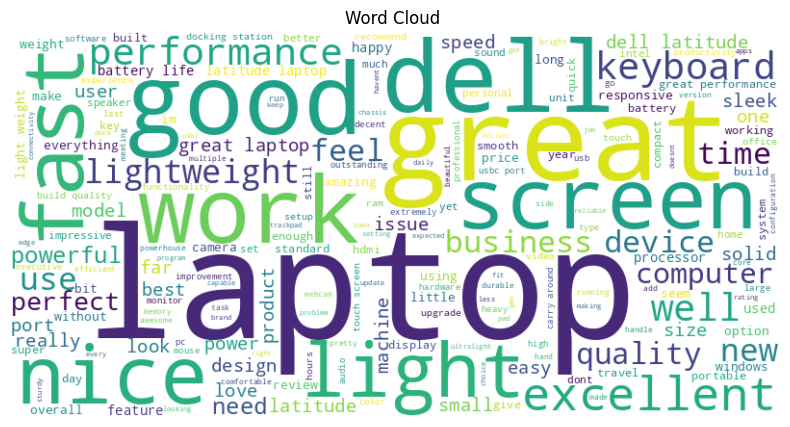

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


generate_wordcloud(df2['Combined_positive_reviews'].astype(str), 'Word Cloud ')



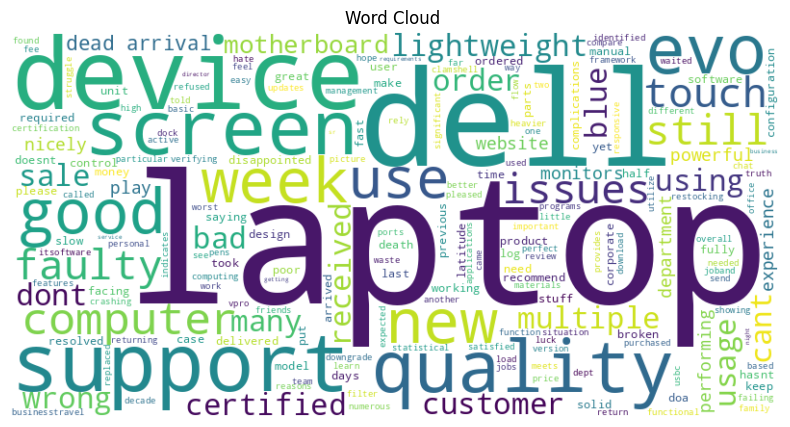

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


generate_wordcloud(df3['Combined_negative_reviews'].astype(str), 'Word Cloud ')



Words that are most frequent

In [ ]:
from collections import Counter


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_most_frequent_words(text, title, num=10):
    all_words = ' '.join(text).split()
    freq_dist = Counter(all_words)
    common_words = freq_dist.most_common(num)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), orient='h')
    plt.title(title)

    # Annotate each bar with the count value
    for index, value in enumerate(counts):
        plt.text(value, index, str(value), va='center')

    plt.show()


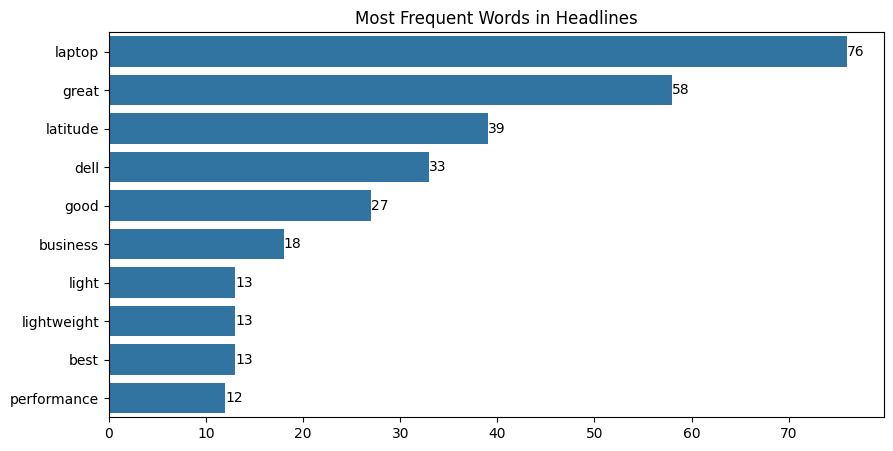

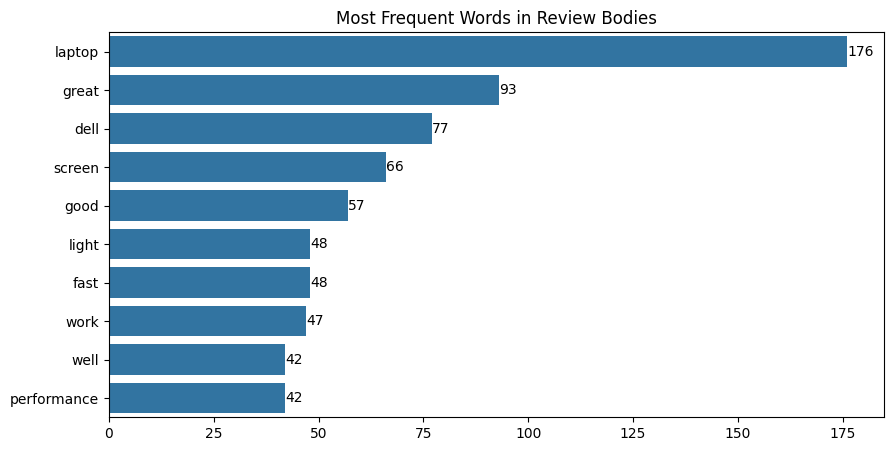

In [ ]:
plot_most_frequent_words(df['cleaned_headline'], 'Most Frequent Words in Headlines')
plot_most_frequent_words(df['cleaned_reviewBody'], 'Most Frequent Words in Review Bodies')

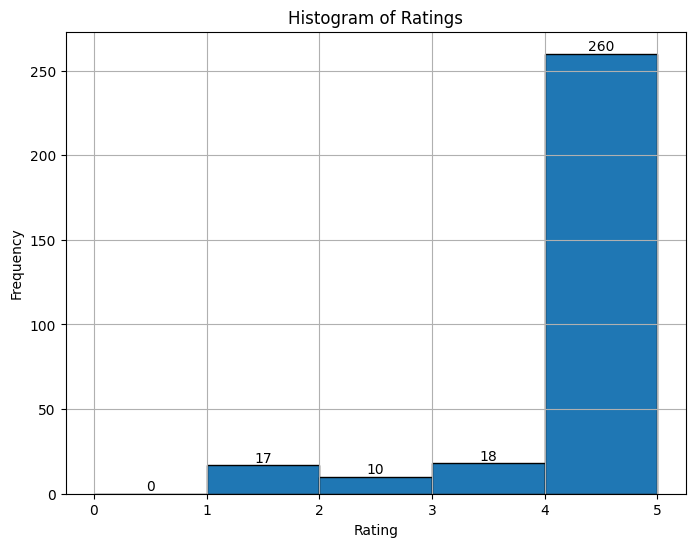

In [ ]:
plt.figure(figsize=(8, 6))

# Define the bins for the histogram
bins = [0, 1, 2, 3, 4, 5]

# Plotting the histogram
plt.hist(df['ratingValue'], bins=bins, edgecolor='black')

# Customize labels and title
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Add gridlines for better readability
plt.grid(True)

# Calculate counts for each bin using numpy
counts, _ = np.histogram(df['ratingValue'], bins=bins)

# Annotate each bar with counts
for i in range(len(counts)):
    plt.text(bins[i] + 0.5, counts[i], str(counts[i]), ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
def count_words_occurrences(text):
    # Define the regular expression pattern
    pattern = r'\b(cost|costly|costing|price|expensive)\b'
    return len(re.findall(pattern, text, flags=re.IGNORECASE))
df['words_count'] = df['cleaned_reviewBody'].apply(count_words_occurrences)

In [ ]:
total_words_count = df['words_count'].sum()
print(f'Total occurrences of cost related words : {total_words_count}')

Total occurrences of cost related words : 10


In [ ]:
def count_physical_occurrences(text):
    # Define the regular expression pattern
    pattern = r'\b(weight|heavy|light|slim|wide|Small|large|thin|lightweight|bulky|portable|design|display|touchpad|hinge|camera)\b'
    return len(re.findall(pattern, text, flags=re.IGNORECASE))
df['physical_count'] = df['cleaned_reviewBody'].apply(count_physical_occurrences)

In [ ]:
total_physical_count = df['physical_count'].sum()
print(f'Total occurrences of the performance related words: {total_physical_count}')

Total occurrences of the performance related words: 207


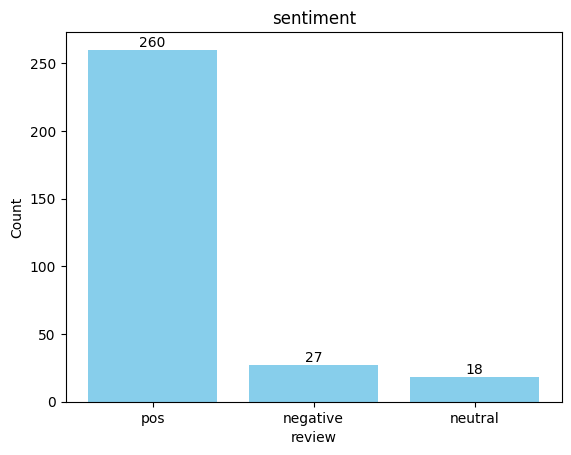

In [ ]:

import matplotlib.pyplot as plt
# Count the occurrences of each label
label_counts = df['sentiment'].value_counts()

# Plot the bar chart
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('review')
plt.ylabel('Count')
plt.title('sentiment')

# Display the count values above each bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

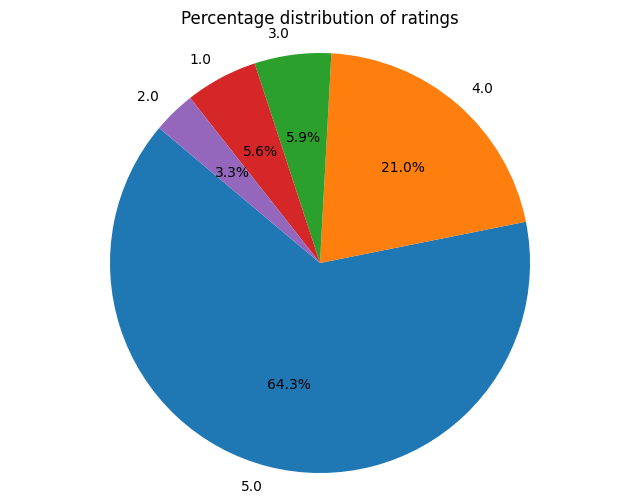

In [ ]:
rating_counts = df['ratingValue'].value_counts()

# Calculate percentages
percentages = 100 * rating_counts / len(df)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage distribution of ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Models**

SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon') #Valence Aware Dictionary and sEntiment Reasoner

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# SentimentIntensityAnalyzerSentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function for sentiment analysis
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis
df['sentiment_score'] = df['cleaned_reviewBody'].apply(get_sentiment_score)

In [ ]:
df['sentiment_score']

0      0.9042
1      0.5994
2      0.9756
3      0.7650
4      0.9081
        ...  
300   -0.3182
301   -0.6486
302   -0.5423
303    0.3400
304    0.3400
Name: sentiment_score, Length: 305, dtype: float64

In [ ]:
df['sentiment_score'].describe()

count    305.000000
mean       0.531115
std        0.404334
min       -0.796400
25%        0.340000
50%        0.636900
75%        0.851900
max        0.998100
Name: sentiment_score, dtype: float64

In [ ]:
def assign_label(x):
    if x <= -0.5:
        return 'negative'
    elif x >= 0.5:
        return 'pos'
    else:
        return 'neutral'

In [ ]:
df['Predicted_sentiment'] = df['sentiment_score'].apply(lambda x: assign_label(x))

In [ ]:
df[['sentiment','Predicted_sentiment']]

,sentiment,Predicted_sentiment
0,pos,pos
1,pos,pos
2,pos,pos
3,pos,pos
4,pos,pos
...,...,...
300,negative,neutral
301,negative,negative
302,negative,negative
303,negative,neutral


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
cm = confusion_matrix(df['sentiment'], df['Predicted_sentiment'])

# Extract TP, TN, FP, FN from confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [ ]:
accuracy = accuracy_score(df['sentiment'], df['Predicted_sentiment'])
precision = precision_score(df['sentiment'], df['Predicted_sentiment'], average='weighted')
recall = recall_score(df['sentiment'], df['Predicted_sentiment'], average='weighted')
f1 = f1_score(df['sentiment'], df['Predicted_sentiment'], average='weighted')


In [ ]:
# Print the metrics
print("Confusion Matrix:")
print(cm)
print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[  5  18   4]
 [  2   8   8]
 [  0  83 177]]

Metrics:
Accuracy: 0.62
Precision: 0.87
Recall: 0.62
F1 Score: 0.71


Model 2

In [ ]:
X=list(df['cleaned_reviewBody'])

In [ ]:
y=list(df['sentiment'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming y is your categorical variable as a list or pandas Series
LE = LabelEncoder()
y = LE.fit_transform(y)

In [ ]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer

In [ ]:
# First split into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the training set further into training (70%) and validation (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)
val_encodings = tokenizer(X_val, truncation=True, padding=True)


In [ ]:
"""import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    y_val
))

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Assuming train_encodings, test_encodings, val_encodings are dictionaries containing your input encodings
# and y_train, y_test, y_val are your corresponding labels

class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create datasets
train_dataset = MyDataset(train_encodings, y_train)
test_dataset = MyDataset(test_encodings, y_test)
val_dataset = MyDataset(val_encodings, y_val)

In [ ]:
train_dataset

In [ ]:
from transformers import TrainingArguments, Trainer, DistilBertForSequenceClassification

In [ ]:
# Load the pre-trained DistilBERT model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [ ]:

# Define training arguments with reduced batch sizes and gradient accumulation
training_args = TrainingArguments(
    output_dir='./results',                  # Output directory
    num_train_epochs=1,                      # Number of training epochs
    per_device_train_batch_size=4,           # Reduced batch size per device during training
)


In [ ]:

# Initialize the Trainer
trainer = Trainer(
    model=model,                            # The instantiated Transformers model to be trained
    args=training_args,                     # Training arguments
    train_dataset=train_dataset,            # Training dataset (PyTorch Dataset object)
    eval_dataset=test_dataset,               # Evaluation dataset (PyTorch Dataset object)
    compute_metrics=compute_metrics
)



RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
# Start training
trainer.train()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
import torch


In [ ]:
   print(torch.__version__)
   print(torch.version.cuda)
   !nvidia-smi

2.3.0+cu121
12.1
Wed Jun 26 18:30:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              34W /  70W |    883MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+--------

Model 3


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming df is your DataFrame with 'cleaned_data' and 'y' columns
# Example data preparation
X = df['cleaned_reviewBody'].astype(str)  # Convert to string format
y = df['sentiment']


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 2])

In [ ]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



In [ ]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)



MultinomialNB()

In [ ]:
# Predict on test data
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:")
report_model_3_NB=classification_report(y_test, y_pred_nb, zero_division=0)
print(classification_report(y_test, y_pred_nb, zero_division=0))

Accuracy: 0.8688524590163934

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.87      1.00      0.93        53

    accuracy                           0.87        61
   macro avg       0.29      0.33      0.31        61
weighted avg       0.75      0.87      0.81        61



Model 4

In [ ]:
X = df['cleaned_reviewBody'].astype(str)  # Convert to string format
y = df['sentiment']



In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the TF-IDF transformed data
svm_clf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test_tfidf)
report_model_4_SVM=classification_report(y_test, y_pred_svm, zero_division=0)
# Evaluate the classifier
print(classification_report(y_test, y_pred_svm, zero_division=0))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.87      1.00      0.93        53

    accuracy                           0.87        61
   macro avg       0.29      0.33      0.31        61
weighted avg       0.75      0.87      0.81        61



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Accuracy: 0.8688524590163934


Model 5


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df['cleaned_reviewBody'].astype(str)  # Convert to string format
y = df['sentiment']

In [ ]:
tokenizer = Tokenizer(num_words=5000, lower=True, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)

In [ ]:
X_tokenized

[[89, 7, 206, 2, 344, 266, 5, 345, 267, 8, 748, 141, 172],
 [26, 346, 18, 207, 38, 18, 2],
 [3,
  55,
  14,
  17,
  5,
  6,
  90,
  142,
  12,
  14,
  143,
  101,
  109,
  78,
  52,
  474,
  25,
  2,
  208,
  39,
  144,
  9,
  749],
 [17, 2, 9, 64, 209, 267, 475, 110, 347, 2],
 [26,
  6,
  20,
  91,
  56,
  35,
  348,
  56,
  35,
  27,
  476,
  477,
  750,
  2,
  6,
  33,
  25,
  5,
  268,
  57,
  269,
  53,
  751,
  270,
  9,
  3],
 [7, 25, 20, 36, 12],
 [37, 20, 2, 7, 8],
 [17, 752, 271, 3, 33, 15, 40, 10, 58, 478, 48, 18, 24],
 [78,
  20,
  14,
  753,
  479,
  349,
  145,
  92,
  93,
  8,
  754,
  93,
  79,
  480,
  31,
  481,
  173,
  8,
  91,
  56,
  755,
  756,
  173],
 [482, 16, 146, 272, 757, 7, 25, 41, 758, 2],
 [2, 92, 21, 42, 19, 80, 81, 78, 174, 273, 12, 52, 483, 759],
 [4,
  16,
  484,
  350,
  760,
  49,
  2,
  485,
  486,
  3,
  487,
  11,
  82,
  14,
  40,
  59,
  488,
  274,
  489,
  147,
  490,
  2],
 [17, 14, 148],
 [65,
  66,
  351,
  49,
  175,
  15,
  111,
  14,
 

In [ ]:
len(X_tokenized)

305

In [ ]:
maxlen = 100
X_padded = pad_sequences(X_tokenized, maxlen=maxlen)

In [ ]:
y

0           pos
1           pos
2           pos
3           pos
4           pos
         ...   
300    negative
301    negative
302    negative
303    negative
304    negative
Name: sentiment, Length: 305, dtype: object

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [ ]:
y_categorical

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)


In [ ]:
# Build the LSTM model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 10
batch_size = 32

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)



Epoch 1/10
8/8 - 10s - loss: 1.0023 - accuracy: 0.7541 - val_loss: 0.6565 - val_accuracy: 0.8689 - 10s/epoch - 1s/step
Epoch 2/10
8/8 - 3s - loss: 0.5597 - accuracy: 0.8484 - val_loss: 0.4927 - val_accuracy: 0.8689 - 3s/epoch - 436ms/step
Epoch 3/10
8/8 - 5s - loss: 0.5296 - accuracy: 0.8484 - val_loss: 0.4872 - val_accuracy: 0.8689 - 5s/epoch - 666ms/step
Epoch 4/10
8/8 - 3s - loss: 0.5089 - accuracy: 0.8484 - val_loss: 0.4716 - val_accuracy: 0.8689 - 3s/epoch - 418ms/step
Epoch 5/10
8/8 - 3s - loss: 0.4935 - accuracy: 0.8484 - val_loss: 0.4642 - val_accuracy: 0.8689 - 3s/epoch - 416ms/step
Epoch 6/10
8/8 - 4s - loss: 0.4739 - accuracy: 0.8484 - val_loss: 0.4684 - val_accuracy: 0.8689 - 4s/epoch - 486ms/step
Epoch 7/10
8/8 - 4s - loss: 0.4145 - accuracy: 0.8484 - val_loss: 0.4638 - val_accuracy: 0.8689 - 4s/epoch - 549ms/step
Epoch 8/10
8/8 - 3s - loss: 0.3484 - accuracy: 0.8811 - val_loss: 0.4592 - val_accuracy: 0.8689 - 3s/epoch - 425ms/step
Epoch 9/10
8/8 - 4s - loss: 0.2648 - accu

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Accuracy: {accuracy*100:.2f}%')

2/2 - 0s - loss: 0.4215 - accuracy: 0.8689 - 84ms/epoch - 42ms/step
Accuracy: 86.89%


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)


2/2 [==============================] - 0s 28ms/step


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 86.89%


In [ ]:
report_model_5 = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, output_dict=True, zero_division=0)

# Print the classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, zero_division=0))

print(report_model_5)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         7
     neutral       0.00      0.00      0.00         1
         pos       0.87      1.00      0.93        53

    accuracy                           0.87        61
   macro avg       0.29      0.33      0.31        61
weighted avg       0.75      0.87      0.81        61

{'negative': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7}, 'neutral': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'pos': {'precision': 0.8688524590163934, 'recall': 1.0, 'f1-score': 0.9298245614035088, 'support': 53}, 'accuracy': 0.8688524590163934, 'macro avg': {'precision': 0.2896174863387978, 'recall': 0.3333333333333333, 'f1-score': 0.30994152046783624, 'support': 61}, 'weighted avg': {'precision': 0.7549045955388337, 'recall': 0.8688524590163934, 'f1-score': 0.8078803566292782, 'support': 61}}
